In [1]:
import numpy as np
from math import atan, acos, asin, sin, cos, sqrt, pi
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
# known parameters
l1 = 0.042
l2 = 0.115
l3 = 0.120
l4 = 0.058
l5 = 0.135
l6 = 0.150
delta = -0.004
Xs = -0.126
Ys = -0.136
ls = 0.020
t_values = np.linspace(0,7.5,1000000)#
alpha_vel = 50 #velocity of shaft
theta0_1 = alpha_vel * t_values  # considering time as variable only
theta0_2 = np.linspace(0, 720, 100) # considering theta as variable only
theta_s = 0
Y = []
L = []

dtheta_dt = alpha_vel

#Considering theta as variable only

Maximum Y: 0.13193192737106293
Minimum Y: 0.006594230721183571
Difference: 0.12533769664987937


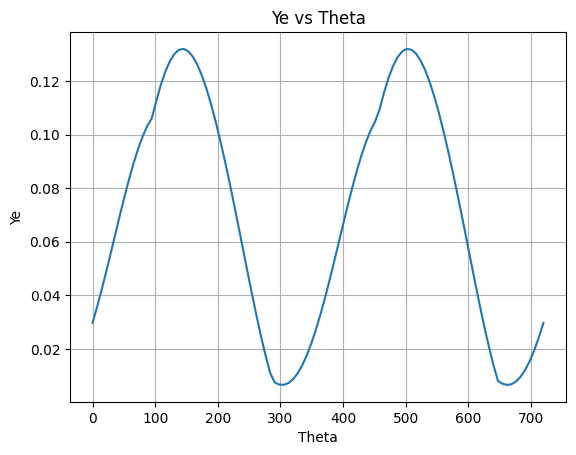

In [2]:
for theta in theta0_2:
    Xc = Xs + ls * cos(pi * theta_s / 180)
    Yc = Ys + ls * sin(pi * theta_s / 180)
    Xz = l1 * cos(pi * theta / 180) - Xc
    Yz = l1 * sin(pi * theta / 180) - Yc
    Xz2 = Xz ** 2
    Yz2 = Yz ** 2
    theta_3 = atan(Yz / Xz) - acos((l3 ** 2 - l2 ** 2 + Xz2 + Yz2) / (2 * l3 * sqrt(Xz2 + Yz2)))
    theta_2 = pi - asin((l3 * sin(theta_3) - Yz) / l2)
    theta_4 = theta_2 - acos((l2 ** 2 + l4 ** 2 - l5 ** 2) / (2 * l2 * l4))
    Xd = l1 * cos(pi * theta / 180) + l4 * cos(theta_4)
    Yd = l1 * sin(pi * theta / 180) + l4 * sin(theta_4)
    theta_6 = acos((delta - Xd) / l6)
    Ye = Yd + l6 * cos(theta_6)
    Y.append(Ye)
    L.append(theta)

t = max(Y)
p = min(Y)
q = t - p
print("Maximum Y:", t)
print("Minimum Y:", p)
print("Difference:", q)
plt.plot(L, Y)
plt.xlabel('Theta')
plt.ylabel('Ye')
plt.title('Ye vs Theta')
plt.grid(True)
plt.show()

Considering time as variable along with theta

Maximum Y: 0.13196742508548753
Minimum Y: 0.006589594568052776
Difference: 0.12537783051743476


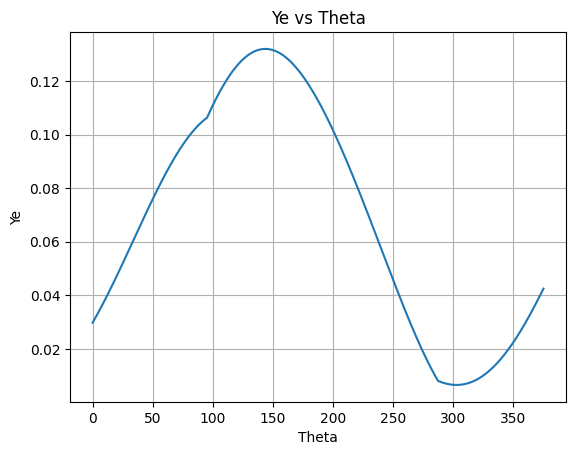

In [3]:
theta_s = 0
Y = []
L = []

for theta in theta0_1:
    Xc = Xs + ls * cos(pi * theta_s / 180)
    Yc = Ys + ls * sin(pi * theta_s / 180)
    Xz = l1 * cos(pi * theta / 180) - Xc
    Yz = l1 * sin(pi * theta / 180) - Yc
    Xz2 = Xz ** 2
    Yz2 = Yz ** 2
    theta_3 = atan(Yz / Xz) - acos((l3 ** 2 - l2 ** 2 + Xz2 + Yz2) / (2 * l3 * sqrt(Xz2 + Yz2)))
    theta_2 = pi - asin((l3 * sin(theta_3) - Yz) / l2)
    theta_4 = theta_2 - acos((l2 ** 2 + l4 ** 2 - l5 ** 2) / (2 * l2 * l4))
    Xd = l1 * cos(pi * theta / 180) + l4 * cos(theta_4)
    Yd = l1 * sin(pi * theta / 180) + l4 * sin(theta_4)
    theta_6 = acos((delta - Xd) / l6)
    Ye = Yd + l6 * cos(theta_6)
    Y.append(Ye)
    L.append(theta)

t = max(Y)
p = min(Y)
q = t - p
print("Maximum Y:", t)
print("Minimum Y:", p)
print("Difference:", q)
plt.plot(L, Y)
plt.xlabel('Theta')
plt.ylabel('Ye')
plt.title('Ye vs Theta')
plt.grid(True)
plt.show()

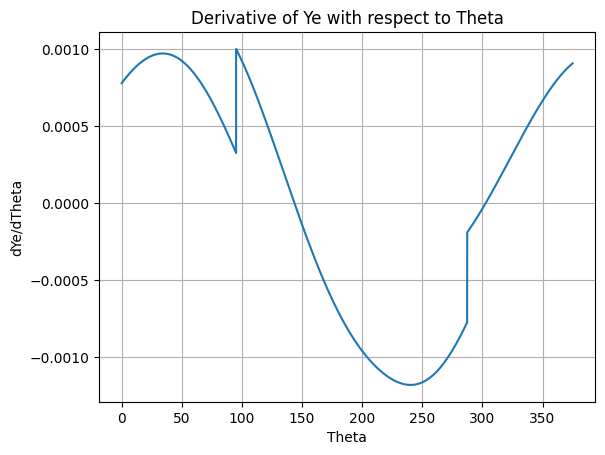

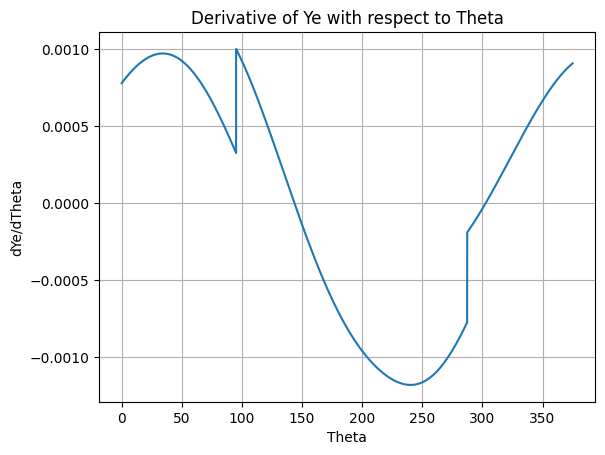

[0.03901762 0.03901771 0.03901791 ... 0.04543751 0.04543763 0.04543769]


In [4]:
dYe_dtheta1 = np.gradient(Y,L)
plt.plot(L, dYe_dtheta1)
plt.xlabel('Theta')
plt.ylabel('dYe/dTheta')
plt.title('Derivative of Ye with respect to Theta')
plt.grid(True)
plt.show()

dYe_dtheta = np.gradient(Y,theta0_1)
plt.plot(theta0_1, dYe_dtheta)
plt.xlabel('Theta')
plt.ylabel('dYe/dTheta')
plt.title('Derivative of Ye with respect to Theta')
plt.grid(True)
plt.show()

vel_Ye= dYe_dtheta*dtheta_dt
print(vel_Ye)

Now for velocity of piston along with time

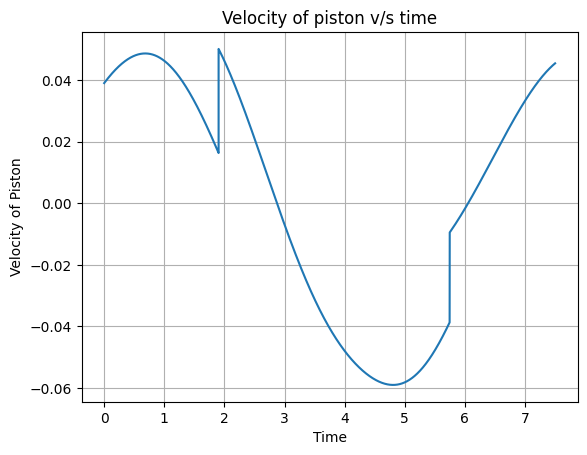

In [5]:
plt.plot(t_values,vel_Ye)
plt.xlabel('Time')
plt.ylabel('Velocity of Piston')
plt.title('Velocity of piston v/s time')
plt.grid(True)
plt.show()

Now for Velocity of piston with theta

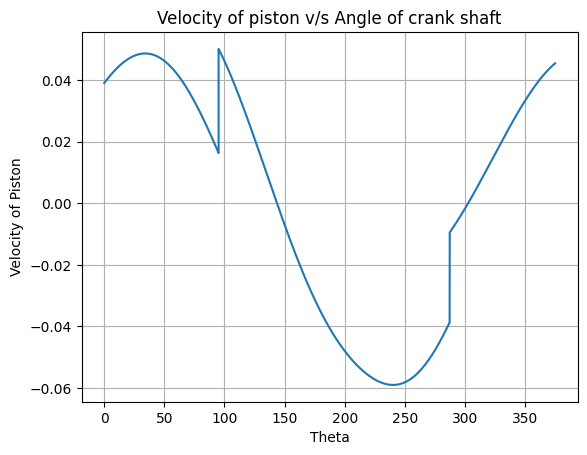

In [6]:
plt.plot(theta0_1,vel_Ye)
plt.xlabel('Theta')
plt.ylabel('Velocity of Piston')
plt.title('Velocity of piston v/s Angle of crank shaft')
plt.grid(True)
plt.show()

In [7]:
accl_Ye = np.gradient(vel_Ye,t_values)
print(accl_Ye)

[0.01304751 0.01957082 0.02609404 ... 0.01622776 0.0121709  0.00811407]


Acceleration of piston v/s time

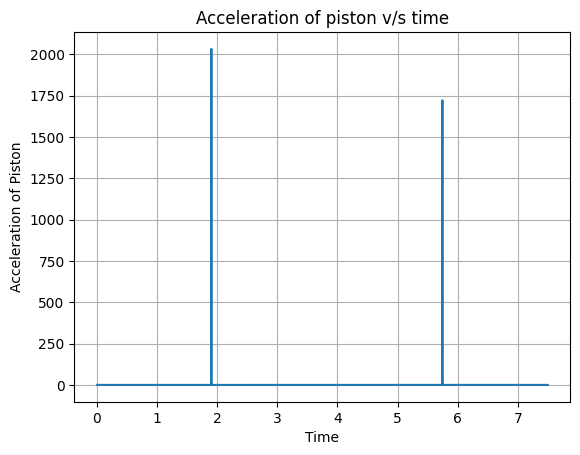

In [8]:
plt.plot(t_values,accl_Ye)
plt.xlabel('Time')
plt.ylabel('Acceleration of Piston')
plt.title('Acceleration of piston v/s time')
plt.grid(True)
plt.show()

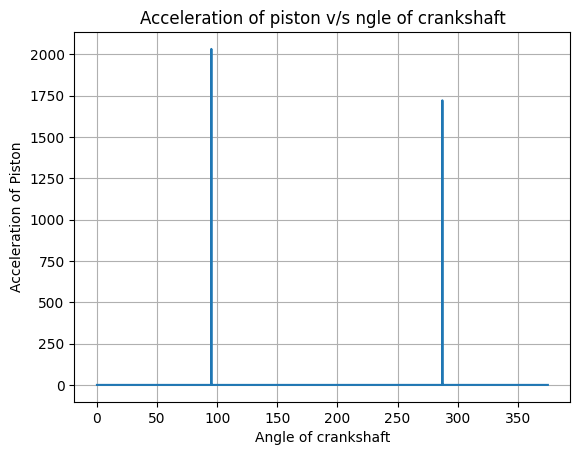

In [9]:
plt.plot(theta0_1,accl_Ye)
plt.xlabel('Angle of crankshaft')
plt.ylabel('Acceleration of Piston')
plt.title('Acceleration of piston v/s ngle of crankshaft')
plt.grid(True)
plt.show()

With Theta_s slider

In [10]:
def Ye_vs_theta0_1(theta_s):
    Y = []
    L = []
    for theta in theta0_1:
        Xc = Xs + ls * cos(pi * theta_s / 180)
        Yc = Ys + ls * sin(pi * theta_s / 180)
        Xz = l1 * cos(pi * theta / 180) - Xc
        Yz = l1 * sin(pi * theta / 180) - Yc
        Xz2 = Xz ** 2
        Yz2 = Yz ** 2
        theta_3 = atan(Yz / Xz) - acos((l3 ** 2 - l2 ** 2 + Xz2 + Yz2) / (2 * l3 * sqrt(Xz2 + Yz2)))
        theta_2 = pi - asin((l3 * sin(theta_3) - Yz) / l2)
        theta_4 = theta_2 - acos((l2 ** 2 + l4 ** 2 - l5 ** 2) / (2 * l2 * l4))
        Xd = l1 * cos(pi * theta / 180) + l4 * cos(theta_4)
        Yd = l1 * sin(pi * theta / 180) + l4 * sin(theta_4)
        theta_6 = acos((delta - Xd) / l6)
        Ye = Yd + l6 * cos(theta_6)
        Y.append(Ye)
        L.append(theta)

    t = max(Y)
    p = min(Y)
    q = t - p
    print("Maximum Y:", t)
    print("Minimum Y:", p)
    print("Difference:", q)
    plt.plot(L, Y)
    plt.xlabel('Theta')
    plt.ylabel('Ye')
    plt.title('Ye vs Theta')
    plt.grid(True)
    plt.show()

    #Now for velocity of piston along with time
    dYe_dtheta = np.gradient(Y,theta0_1)
    plt.plot(theta0_1, dYe_dtheta)
    plt.xlabel('Theta')
    plt.ylabel('dYe/dTheta')
    plt.title('Derivative of Ye with respect to Theta')
    plt.grid(True)
    plt.show()
    
    vel_Ye= dYe_dtheta*dtheta_dt
    print(vel_Ye)
    
    #Now for Velocity of piston with theta
    plt.plot(t_values,vel_Ye)
    plt.xlabel('Time')
    plt.ylabel('Velocity of Piston')
    plt.title('Velocity of piston v/s time')
    plt.grid(True)
    plt.show()

    accl_Ye = np.gradient(vel_Ye,t_values)
    print(accl_Ye)
    
    #Acceleration of piston v/s time
    plt.plot(t_values,accl_Ye)
    plt.xlabel('Time')
    plt.ylabel('Acceleration of Piston')
    plt.title('Acceleration of piston v/s time')
    plt.grid(True)
    plt.show()
    
    plt.plot(theta0_1,accl_Ye)
    plt.xlabel('Angle of crankshaft')
    plt.ylabel('Acceleration of Piston')
    plt.title('Acceleration of piston v/s ngle of crankshaft')
    plt.grid(True)
    plt.show()
    
    plt.plot(theta0_1,accl_Ye)
    plt.xlabel('Angle of crankshaft')
    plt.ylabel('Acceleration of Piston')
    plt.title('Acceleration of piston v/s ngle of crankshaft')
    plt.grid(True)
    plt.show()

In [11]:
def Ye_vs_theta0_2(theta_s):
    Y = []
    L = []
    for theta in theta0_2:
        Xc = Xs + ls * cos(pi * theta_s / 180)
        Yc = Ys + ls * sin(pi * theta_s / 180)
        Xz = l1 * cos(pi * theta / 180) - Xc
        Yz = l1 * sin(pi * theta / 180) - Yc
        Xz2 = Xz ** 2
        Yz2 = Yz ** 2
        theta_3 = atan(Yz / Xz) - acos((l3 ** 2 - l2 ** 2 + Xz2 + Yz2) / (2 * l3 * sqrt(Xz2 + Yz2)))
        theta_2 = pi - asin((l3 * sin(theta_3) - Yz) / l2)
        theta_4 = theta_2 - acos((l2 ** 2 + l4 ** 2 - l5 ** 2) / (2 * l2 * l4))
        Xd = l1 * cos(pi * theta / 180) + l4 * cos(theta_4)
        Yd = l1 * sin(pi * theta / 180) + l4 * sin(theta_4)
        theta_6 = acos((delta - Xd) / l6)
        Ye = Yd + l6 * cos(theta_6)
        Y.append(Ye)
        L.append(theta)

    t = max(Y)
    p = min(Y)
    q = t - p
    print("Maximum Y:", t)
    print("Minimum Y:", p)
    print("Difference:", q)
    plt.plot(L, Y)
    plt.xlabel('Theta')
    plt.ylabel('Ye')
    plt.title('Ye vs Theta')
    plt.grid(True)
    plt.show()


In [12]:
# Create slider for theta_s
theta_s_slider = FloatSlider(value=0, min=-180, max=180, step=0.1, description='Theta_s')

# Define function to update plot when slider value changes
def update_plot(theta_s):
    Ye_vs_theta0_2(theta_s)
    Ye_vs_theta0_1(theta_s)

# Show interactive plot
interact(update_plot, theta_s=theta_s_slider)


interactive(children=(FloatSlider(value=0.0, description='Theta_s', max=180.0, min=-180.0), Output()), _dom_cl…

<function __main__.update_plot(theta_s)>